# Using Euler's method to estimate a bubble's velocity

There's a differential equation wich describes an air bubble's velocity rising up a shampoo bottle: \\
$\dfrac{dv}{dt} = \dfrac{\rho_{x} - \rho_{air}g}{\rho_{air}} - \dfrac{b v^{n}}{\dfrac{4}{3}\pi R^{3} \rho_{air}}$ \\
That's not a trivial differential equation to solve! It's better if we use a computational method to find the description of $v(t)$ as an approximation. Euler method will be used here.

$\rho_{air}$ is air density \\
$bv^{n}$ is the viscous friction force between the bubble and the liquid
Let's consider some parametrs: \\
$\rho_{air} = 1.25e-6$ $g mm^{-3}$ \\
$\rho_{1.03e-{3}}$ $gmm^{-3}$ \\
$g = 9.78e{3} mms^{-2}$ \\
n = 1.7 \\
$b = 420 gs^{-0.3} mm^{-0.7}$ \\
R = 2.5mm \\
This method will be computed for $0 < t < 10^{-7}$ with steps of $10^{-9}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

I'll use the generic euler function, which works both for systems and for
a single differential equation, which is the case here, as we only have one equation
of the derivative of the velocity with respect to constants and a power of the velocity.
we will need to solve the system just for velocity, since we already have the
initial condition $v(0) = 0$

In [2]:
def Euler(f, xi, ti, tf, n):
    t = np.zeros(n)
    x = np.zeros((n, len(xi)))

    #o x e t serão arrays para plotarmos os gráficos posteriormente

    if isinstance(xi, (float, int)):
        x = np.zeros(n)
    else:
        neq = len(xi)
        x = np.zeros((n, neq))
    x[0] = xi
    t[0] = ti
    h = (tf-ti)/float(n)
    for k in range(n-1):

        #aqui estamos printando só x[k,0] para que se refira apenas à equação da velocidade
        #esses são os pontos de x no gráfico, e de tempo para plotar
        #questão b)imprimir os valoes de v e t com os passos de 10^-9

        print(x[k,0], t[k])
        t[k+1] = t[k] + h
        x[k+1] = x[k] + h*f(x[k], t[k])

        #veja que v e t dependem do passo à medida que são printados

    return x, t
#esta função abaixo, temos as derivadas com relação ao valor inicial


def f(x,t):

    #definirei aqui as constantes a serem utilizadas

    p_ar = 1.25* 10**(-6)
    p_x = 1.03 * 10**(-3)
    n1 = 1.7 

    #é o 'n' na prova, mas se chamar de n ele vai dar ruim com o n da euler (n de pontos)

    b = 420 
    r = 2.5
    g = 9.78 * 10**(3)

    #sabemos que dx/dt = v, e temos a equação pro dv/dt no enunciado
    #a fórmula utilizada aqui, foi a fórmula do enunciado
    #substituimos v^n ali por x[0] pois define o valor da derivada v no ponto 0
    #afinal, o que sabemos, é o valor da função derivada
    
    return np.array([((p_x - p_ar)/p_ar)*g - b * (x[0]**n1) / (4/3 * np.pi * (r**3)*p_ar)])

0.0 0.0
0.008048940000000001 9.999999999999999e-10
0.016096466856012473 1.9999999999999997e-09
0.024140816222809378 2.9999999999999996e-09
0.03218061279675654 3.9999999999999994e-09
0.04021464748826897 4.999999999999999e-09
0.04824181621171726 5.999999999999999e-09
0.05626109076813044 6.999999999999999e-09
0.06427150205591342 7.999999999999999e-09
0.0722721292783265 8.999999999999998e-09
0.0802620924942749 9.999999999999997e-09
0.08824054721017496 1.0999999999999996e-08
0.09620668030195824 1.1999999999999995e-08
0.10415970684779047 1.2999999999999994e-08
0.11209886760895232 1.3999999999999993e-08
0.12002342698663077 1.4999999999999992e-08
0.1279326713372209 1.599999999999999e-08
0.13582590756355037 1.699999999999999e-08
0.14370246192235708 1.799999999999999e-08
0.15156167900391437 1.8999999999999988e-08
0.15940292085055216 1.9999999999999987e-08
0.16722556618857007 2.0999999999999986e-08
0.17502900975368127 2.1999999999999985e-08
0.18281266169431115 2.2999999999999984e-08
0.19057594704

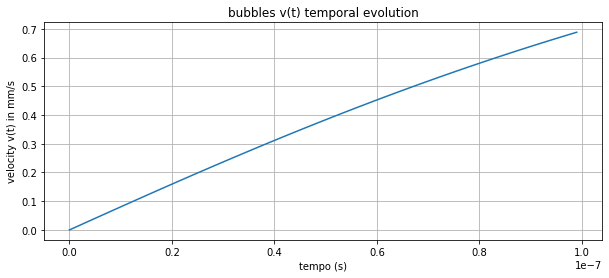

In [3]:
xi = np.array([0])
ti = 0
tf = 10**(-7)  #tempo final definido pela questão
#para passo de 10^-9, que é h = passo, precisamos de n = 100
n = 100
#agora chamamos a função euler, tendo definidos os parâmetros, para plotar os pontos(v,t) e gráfico
x, t = Euler(f, xi, ti, tf, n)
#ajustei o tamanho da figura por questões estéticas
plt.figure(figsize = (10,4))
plt.title('bubbles v(t) temporal evolution')
plt.xlabel('tempo (s)')
plt.ylabel('velocity v(t) in mm/s')
plt.plot(t,x)
plt.grid(True)
plt.show()